In [2]:
# Download data from website
library(tidyverse)
library(repr)
library(readxl)
library(cowplot)
library(RColorBrewer)

bird_data <- read.csv("https://raw.githubusercontent.com/DanielHuangjiakang/Projcet-Group-128-DSCI-100/main/bird%202.csv", header = TRUE)
head(bird_data, n = 20) 

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



,id,huml,humw,ulnal,ulnaw,feml,femw,tibl,tibw,tarl,tarw,type
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,0,80.78,6.68,72.01,4.88,41.81,3.70,5.50,4.03,38.70,3.84,SW
2,1,88.91,6.63,80.53,5.59,47.04,4.30,80.22,4.51,41.50,4.01,SW
3,2,79.97,6.37,69.26,5.28,43.07,3.90,75.35,4.04,38.31,3.34,SW
4,3,77.65,5.70,65.76,4.77,40.04,3.52,69.17,3.40,35.78,3.41,SW
5,4,62.80,4.84,52.09,3.73,33.95,2.72,56.27,2.96,31.88,3.13,SW
6,5,61.92,4.78,50.46,3.47,49.52,4.41,56.95,2.73,29.07,2.83,SW
7,6,79.73,5.94,67.39,4.50,42.07,3.41,71.26,3.56,37.22,3.64,SW
8,7,86.98,5.68,74.52,4.55,44.46,3.78,76.02,3.81,37.94,3.81,SW
9,8,118.20,7.82,116.64,6.13,59.33,5.45,110.00,5.58,61.62,4.37,SW


In [3]:
# huml: Length of Humerus (mm)
# humw: Diameter of Humerus (mm)
# ulnal: Length of Ulna (mm)
# ulnaw: Diameter of Ulna (mm)
# feml: Length of Femur (mm)
# femw: Diameter of Femur (mm)
# tibl: Length of Tibiotarsus (mm)
# tibw: Diameter of Tibiotarsus (mm)
# tarl: Length of Tarsometatarsus (mm)

In [4]:
# Calculate the average of every data of part of the body bone.
bird_bar <- bird_data |>
    select(-id) |>
    group_by(type) |>
    summarize(average_huml = mean(huml, na.rm = TRUE),
             average_humw = mean(humw, na.rm = TRUE),
             average_ulnal = mean(ulnal, na.rm = TRUE),
             average_ulnaw = mean(ulnaw, na.rm = TRUE),
             average_feml = mean(feml, na.rm = TRUE),
             average_femw = mean(femw, na.rm = TRUE),
             average_tibl = mean(tibl, na.rm = TRUE),
             average_tibw = mean(tibw, na.rm = TRUE),
             average_tarl = mean(tarl, na.rm = TRUE),
             average_tarw = mean(tarw, na.rm = TRUE))
bird_bar

type,average_huml,average_humw,average_ulnal,average_ulnaw,average_feml,average_femw,average_tibl,average_tibw,average_tarl,average_tarw
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
P,34.42395,3.039211,39.17737,2.476316,28.21737,2.307895,41.88132,2.095789,25.78737,1.902632
R,86.93440,6.065600,100.34245,4.813265,62.02000,5.266800,89.87740,4.949200,59.16633,5.073878
SO,22.36110,2.029764,26.39810,1.743858,21.38346,1.680313,36.32603,1.548740,25.84266,1.349375
SW,110.25112,6.423966,111.75552,5.221638,42.16966,4.275776,85.31707,4.513534,45.15621,4.149914
T,45.69957,4.786087,45.61739,3.471739,46.27739,3.819565,66.09087,3.451739,40.08652,3.183913
W,73.13308,4.607077,78.10138,4.102615,40.11953,3.118594,76.15000,3.179231,47.54338,2.760308


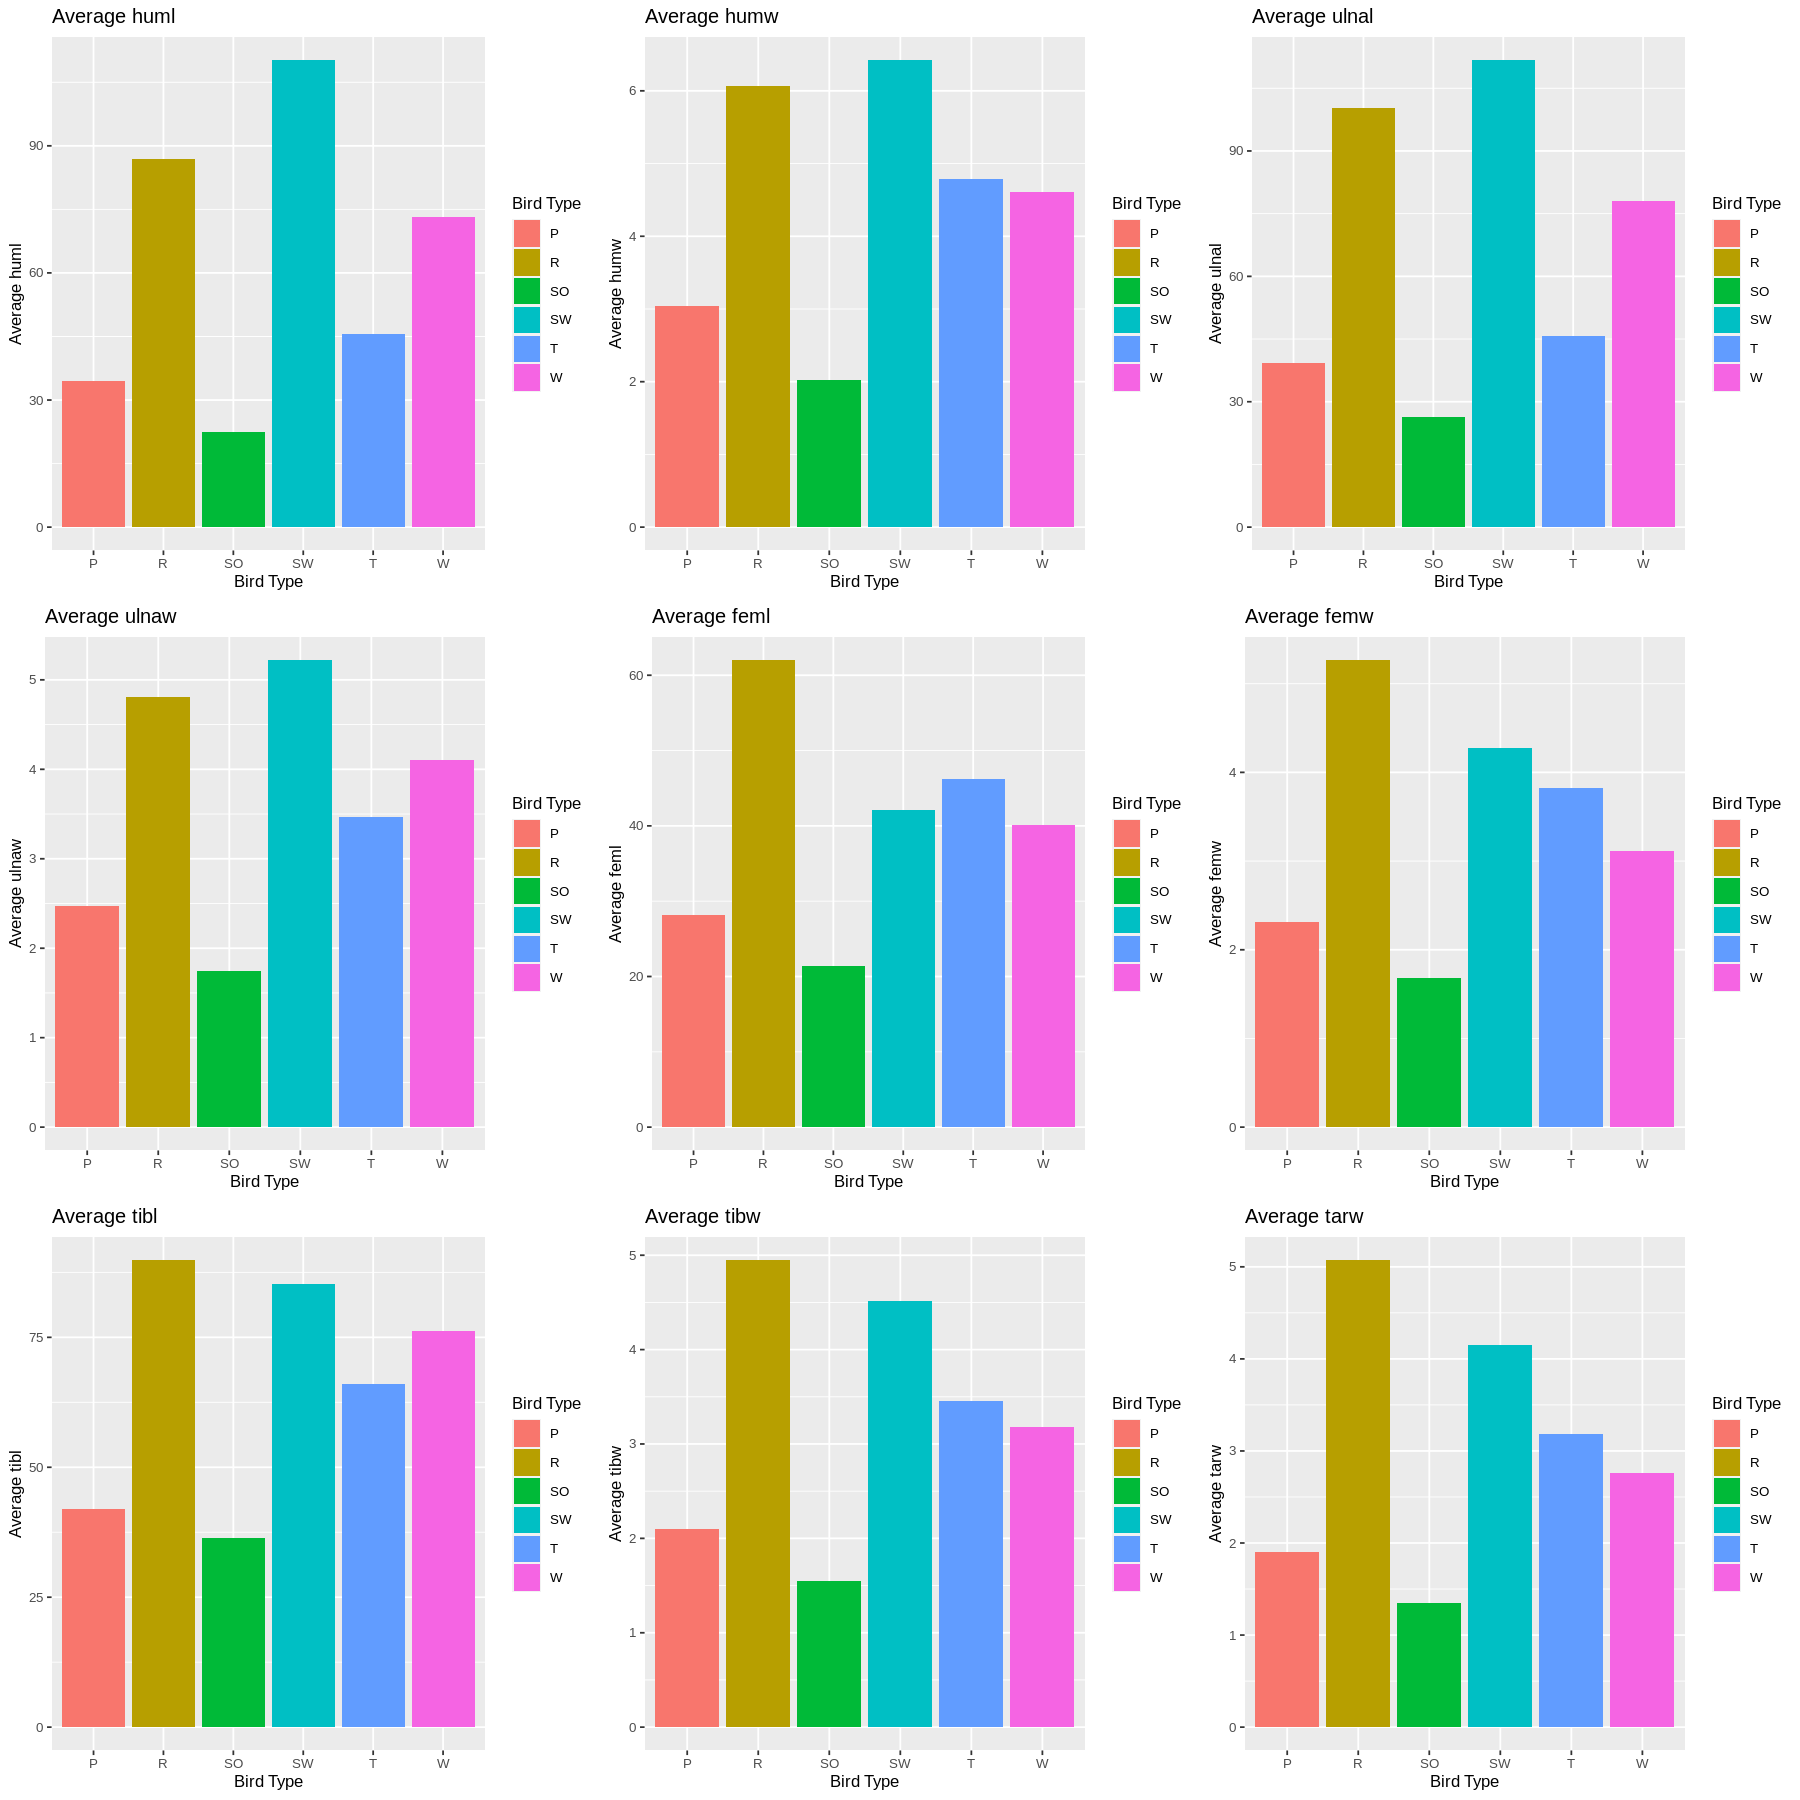

In [5]:
# Use the average data from the part of the body bone to draw the graph of each data, to see have difference of each type.
options(repr.plot.width = 15, repr.plot.height = 15) 
bird_huml <- bird_bar |>
        ggplot(aes(x = type, y = average_huml, fill = type)) + 
            geom_bar(stat = "identity") +
            xlab("Bird Type") +
            ylab("Average huml") +
            labs(fill = "Bird Type") +
            theme(text = element_text(size = 10)) +
            ggtitle("Average huml")

bird_humw <- bird_bar |>
        ggplot(aes(x = type, y = average_humw, fill = type)) + 
            geom_bar(stat = "identity") +
            xlab("Bird Type") +
            ylab("Average humw") +
            labs(fill = "Bird Type") +
            theme(text = element_text(size = 10)) +
            ggtitle("Average humw")

bird_ulnal <- bird_bar |>
        ggplot(aes(x = type, y = average_ulnal, fill = type)) + 
            geom_bar(stat = "identity") +
            xlab("Bird Type") +
            ylab("Average ulnal") +
            labs(fill = "Bird Type") +
            theme(text = element_text(size = 10)) +
            ggtitle("Average ulnal")

bird_ulnaw <- bird_bar |>
        ggplot(aes(x = type, y = average_ulnaw, fill = type)) + 
            geom_bar(stat = "identity") +
            xlab("Bird Type") +
            ylab("Average ulnaw") +
            labs(fill = "Bird Type") +
            theme(text = element_text(size = 10)) +
            ggtitle("Average ulnaw")

bird_feml <- bird_bar |>
        ggplot(aes(x = type, y = average_feml, fill = type)) + 
            geom_bar(stat = "identity") +
            xlab("Bird Type") +
            ylab("Average feml") +
            labs(fill = "Bird Type") +
            theme(text = element_text(size = 10)) +
            ggtitle("Average feml")

bird_femw <- bird_bar |>
        ggplot(aes(x = type, y = average_femw, fill = type)) + 
            geom_bar(stat = "identity") +
            xlab("Bird Type") +
            ylab("Average femw") +
            labs(fill = "Bird Type") +
            theme(text = element_text(size = 10)) +
            ggtitle("Average femw")

bird_tibl <- bird_bar |>
        ggplot(aes(x = type, y = average_tibl, fill = type)) + 
            geom_bar(stat = "identity") +
            xlab("Bird Type") +
            ylab("Average tibl") +
            labs(fill = "Bird Type") +
            theme(text = element_text(size = 10)) +
            ggtitle("Average tibl")

bird_tibw <- bird_bar |>
        ggplot(aes(x = type, y = average_tibw, fill = type)) + 
            geom_bar(stat = "identity") +
            xlab("Bird Type") +
            ylab("Average tibw") +
            labs(fill = "Bird Type") +
            theme(text = element_text(size = 10)) +
            ggtitle("Average tibw")

bird_tarw <- bird_bar |>
        ggplot(aes(x = type, y = average_tarw, fill = type)) + 
            geom_bar(stat = "identity") +
            xlab("Bird Type") +
            ylab("Average tarw") +
            labs(fill = "Bird Type") +
            theme(text = element_text(size = 10)) +
            ggtitle("Average tarw")

plot_grid <- plot_grid(bird_huml, bird_humw, bird_ulnal, bird_ulnaw, bird_feml, bird_femw, 
                       bird_tibl, bird_tibw, bird_tarw, ncol = 3)
plot_grid

Warning message:
“Removed 2 rows containing missing values (geom_point).”
Warning message:
“Removed 1 rows containing missing values (geom_point).”
Warning message:
“Removed 1 rows containing missing values (geom_point).”
Warning message:
“Removed 1 rows containing missing values (geom_point).”


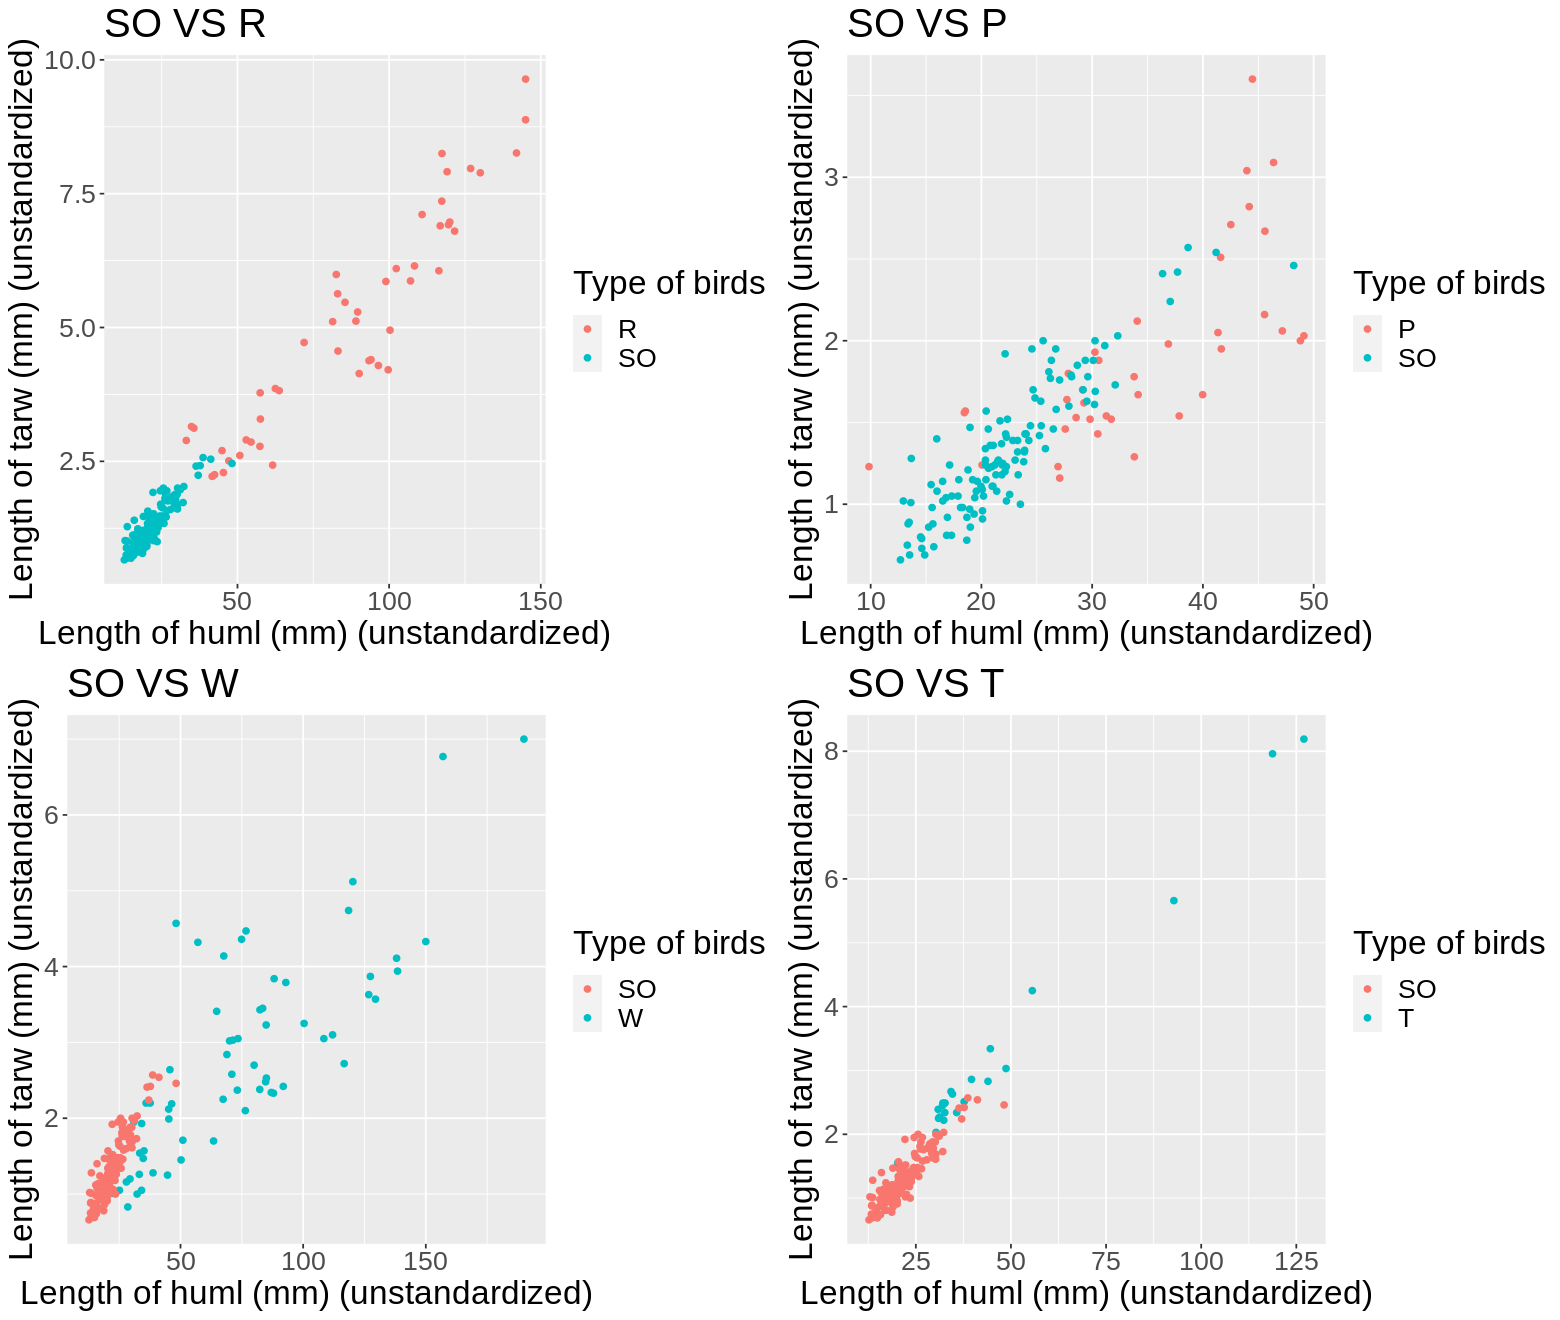

In [6]:
#Compare SO to other type of birds
options(repr.plot.width = 13, repr.plot.height = 11) 
bird_data_ulnal_tarl <- bird_data |>
    select(huml, tarw, type) |>
    filter(type == "SO" | type == "SW") 
bird_scrappter_SO_SW <- bird_data_ulnal_tarl |>
    ggplot(aes(x = huml, y = tarw, color = type)) +
        geom_point() +
        labs(x = "Length of huml (mm) (unstandardized)",
            y = "Length of tarw (mm) (unstandardized)",
            color = "Type of birds") +
        theme(text = element_text(size = 20)) +
            ggtitle("SO VS SW")

bird_data_ulnal_tarl <- bird_data |>
    select(huml, tarw, type) |>
    filter(type == "SO" | type == "W") 
bird_scrappter_SO_W <- bird_data_ulnal_tarl |>
    ggplot(aes(x = huml, y = tarw, color = type)) +
        geom_point() +
        labs(x = "Length of huml (mm) (unstandardized)",
            y = "Length of tarw (mm) (unstandardized)",
            color = "Type of birds") +
        theme(text = element_text(size = 20)) +
            ggtitle("SO VS W")


bird_data_ulnal_tarl <- bird_data |>
    select(huml, tarw, type) |>
    filter(type == "SO" | type == "T") 
bird_scrappter_SO_T <- bird_data_ulnal_tarl |>
    ggplot(aes(x = huml, y = tarw, color = type)) +
        geom_point() +
        labs(x = "Length of huml (mm) (unstandardized)",
            y = "Length of tarw (mm) (unstandardized)",
            color = "Type of birds") +
        theme(text = element_text(size = 20)) +
            ggtitle("SO VS T")
 
bird_data_SO_R <- bird_data |>
    select(huml, tarw, type) |>
    filter(type == "SO" | type == "R")
bird_scrappter_SO_R <- bird_data_SO_R |>
    ggplot(aes(x = huml, y = tarw, color = type)) +
        geom_point() +
        labs(x = "Length of huml (mm) (unstandardized)",
            y = "Length of tarw (mm) (unstandardized)",
            color = "Type of birds") +
        theme(text = element_text(size = 20)) +
            ggtitle("SO VS R") 

bird_data_SO_P <- bird_data |>
    select(huml, tarw, type) |>
    filter(type == "SO" | type == "P")
bird_scrappter_SO_P <- bird_data_SO_P |>
    ggplot(aes(x = huml, y = tarw, color = type)) +
        geom_point() +
        labs(x = "Length of huml (mm) (unstandardized)",
            y = "Length of tarw (mm) (unstandardized)",
            color = "Type of birds") +
        theme(text = element_text(size = 20)) +
            ggtitle("SO VS P") 

plot_grid01 <- plot_grid(bird_scrappter_SO_R, bird_scrappter_SO_P,
                         bird_scrappter_SO_W, bird_scrappter_SO_T, ncol = 2)
plot_grid01

Warning message:
“Removed 2 rows containing missing values (geom_point).”


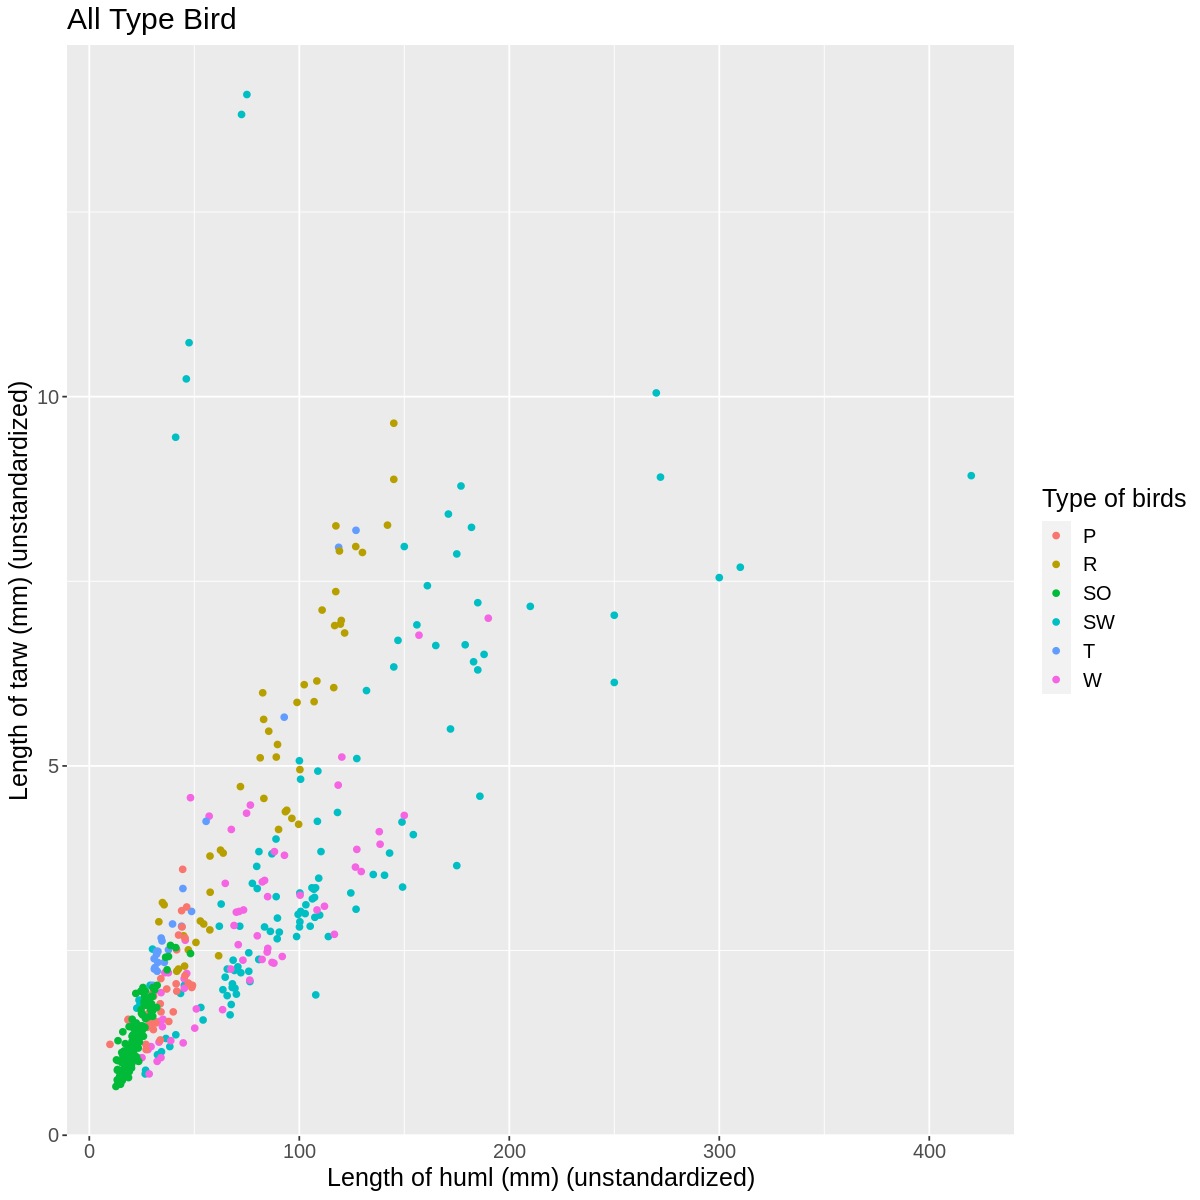

In [15]:
options(repr.plot.width = 10, repr.plot.height = 10) 
bird_data_allbirds <- bird_data |>
    select(huml, tarw, type) 
bird_scrappter <- bird_data_allbirds |>
    ggplot(aes(x = huml, y = tarw, color = type)) +
        geom_point() +
        labs(x = "Length of huml (mm) (unstandardized)",
            y = "Length of tarw (mm) (unstandardized)",
            color = "Type of birds") +
        theme(text = element_text(size = 15)) +
            ggtitle("All Type Bird")

bird_scrappter